The file nile.txt provides the historical data on the Nile minima.

* A.  Do  the  Detrended  Fluctuation  Analysis  on  these  data  and  estimate  the  Hurst  exponent  of  this series.The simplest DFA algorithm requires the series to have $2^s$ elements. You need to either truncate theseries or try to develop an algorithm that will work on the whole series, or at least on a series of length $2^s+ 2^{s′}$.

* B. Go back to the original data. There are 663 data points in the series. Let the series be $\{x_i\}$^{663}_{i=1}. For $n= 2,3, . . . ,663$ do the following:

1.  Let $$\bar{x} = \frac{1}{n}(x_1 +x_2 + ... x_n )$$

2. Calculate the standard deviation,$d_n$, of the subseries $\{x_i\}$^{n}_{i=1}:
$$d_n = \sqrt{\frac{1}{n}\sum( x_i-\bar{x})^2 }$$

3. Calculate the rescaled range:

$$ r^{**}_n = \max_{1 \leq i \leq n} \frac{x_1 + x_2 + \cdots x_n - i \overline{x}}{d_n} - \min_{1 \leq i \leq n} \frac{x_1 + x_2 + \cdots x_n - i \overline{x}}{d_n}$$

4. Plot $r^{**}$ as a function of $n$, $log(r^{∗∗}_n)$ as a function of log(n) and fit:
$$ log(r^{∗∗}_n) = k\cdot \log{\frac{n}{2}}$$


* C. Try interpreting the differences betweenAandB.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft, fftfreq

import scipy as sp
from scipy.signal import periodogram

π = np.pi

# Read data

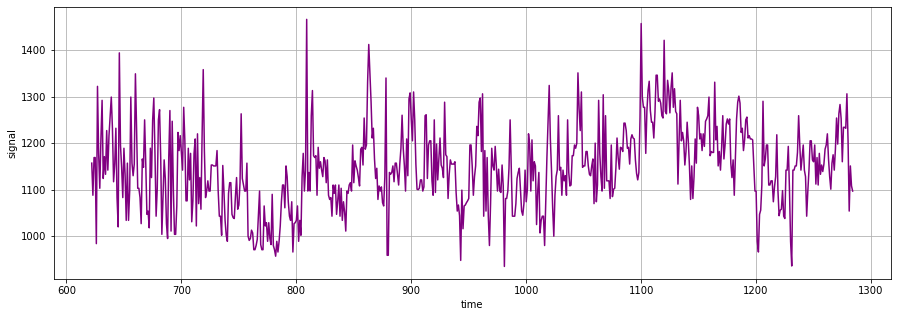

In [2]:
data = np.loadtxt('nile.txt').T
N = len(data)
time = data[0] 
signal = data[1]

fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.plot(time, signal, c='purple')

axs.set_xlabel('time')
axs.set_ylabel('signal')
axs.grid(True)

plt.show()

# Part A

In [3]:
def average(series):
    return np.sum(series)/len(series)


def std(series):
    
    av = average(series)
    temp = np.linspace(0,0,len(series))
    temp[:] = (series[:] - av)**2
    
    return np.sqrt(np.sum(temp)/len(series) )


In [4]:
def get_walk(signal): #cnversion of signal into random walk
    walk = np.linspace(0,0,len(signal))
    av = average(signal) 
    for i in range(1,len(signal)):
        walk[i] = walk[i-1] + (signal[i] - av)
    
    return walk

In [5]:
def get_L(series):
    
    x = np.linspace(0,len(series)-1 ,len(series))
    a, b = np.polyfit(x,series,1)
    
    temp = 0
    for i in range(len(series)):
        temp += ( series[i] - a*i - b )**2
    return np.sqrt(temp/len(series))

In [6]:
def get_Ltab(signal): #return table of avegaged L coefficients
    L_tab = np.linspace(0,0,len(signal)-2) 
    
    for n in range(3,len(signal)+1):
        Ln_tab = np.linspace(0,0,len(signal) - n + 1)
        
        for m in range(len(signal) - n + 1):
            Ln_tab[m] = get_L(signal[m:m+n])
            
        L_tab[n-3] = average(Ln_tab)
    
    return L_tab  #pierwszy argument dla n = 3, bo liniowe fitowanie do 1 punktu nie ma sensu

In [7]:
L_tab = get_Ltab(get_walk(signal))

In [8]:
log_L_tab = np.log(L_tab) #natural logarythm
logn_tab = np.linspace(3,1 +len(L_tab),len(L_tab))
logn_tab = np.log(logn_tab) #natural logarythm

In [9]:
alpha, b0 = np.polyfit(logn_tab,log_L_tab,1)

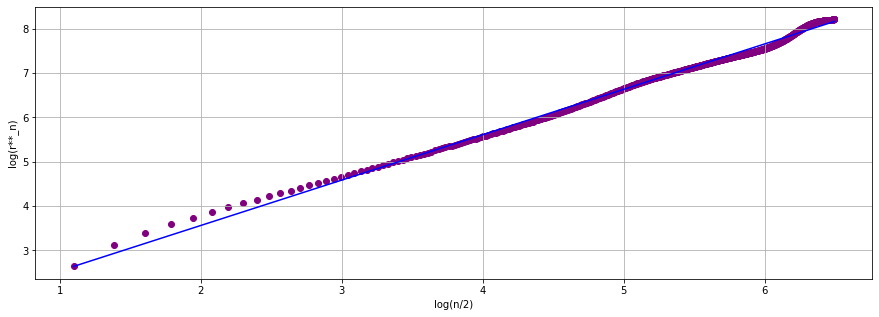

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn_tab, log_L_tab, c='purple')
axs.plot(logn_tab,logn_tab*alpha + b0, c = 'blue')

axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [11]:
print("α = {:}".format(alpha))

α = 1.023078915024506


# Part B

Having $N$ data points, there are $m = N - n + 1$ subserieses of lenght n. 

Therefore for given $n$, I will perform every step on each of subserieses, and in the endtake an average

In [12]:
def res_range(series):
    
    av = average(series)
    
    max_r = 0.0 #the first step with i = 0
    min_r = 0.0
    
    par_sum = series[0]

    for i in range(1,len(series)):
        
        par_sum += series[i]
        
        temp = (par_sum - av*i)
        if temp > max_r:
            max_r = temp
            
        if temp < min_r:
            min_r = temp
            
    return (max_r - min_r)/std(series)   

In [13]:
def get_rns(signal):
    r_tab = np.linspace(0,0,len(signal)-1) 
    
    for n in range(2,len(signal)+1):
        rn_tab = np.linspace(0,0,len(signal) - n + 1)
        
        for m in range(len(signal) - n + 1):
            rn_tab[m] = res_range(signal[m:m+n])
            
        r_tab[n-2] = average(rn_tab)
    
    return r_tab  #pierwszy argument dla n = 2, bo dla n = 1 std nie ma sensu

In [14]:
rn_tab = get_rns(signal)

<ipython-input-12-8dd863b1e2d3>:21: RuntimeWarning: divide by zero encountered in double_scalars
  return (max_r - min_r)/std(series)


In [15]:
log_rn_tab = np.log(rn_tab) #natural logarythm
logn_tab = np.linspace(2,1 +len(rn_tab),len(rn_tab))
logn2_tab = np.log(logn_tab/2) #natural logarythm

In [16]:
alpha2, b2 = np.polyfit(logn2_tab[2:],log_rn_tab[2:],1)

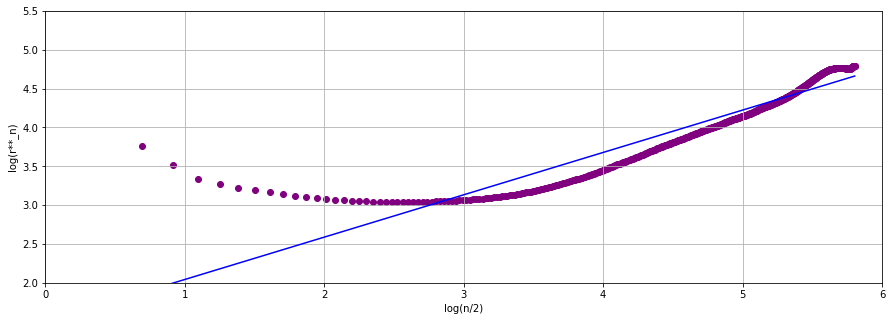

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn2_tab, log_rn_tab, c='purple')
axs.plot(logn2_tab,logn2_tab*alpha2 + b2, c = 'blue')
axs.set_ylim([2, 5.5])
axs.set_xlim([0, 6])


axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [18]:
print("α = {:}".format(alpha2))

α = 0.5455488757547934


### Fit without first 100 points

In [19]:
alpha3, b3 = np.polyfit(logn2_tab[100:],log_rn_tab[100:],1)

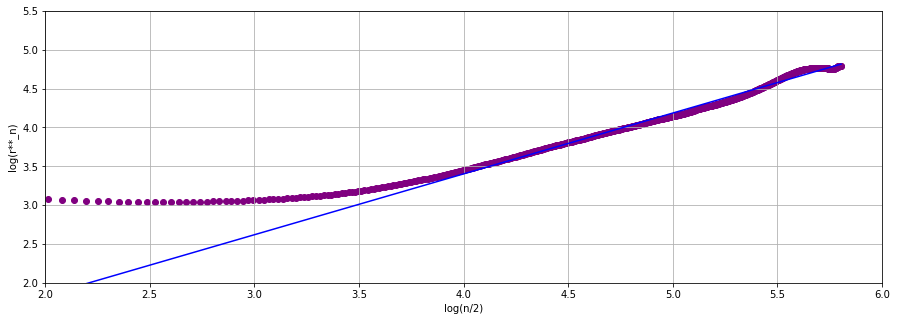

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn2_tab, log_rn_tab, c='purple')
axs.plot(logn2_tab,logn2_tab*alpha3 + b3, c = 'blue')
axs.set_ylim([2, 5.5])
axs.set_xlim([2.0, 6.0])


axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [21]:
print("α = {:}".format(alpha3))

α = 0.7837294472720198


### Fit without first 300 points

In [22]:
alpha4, b4 = np.polyfit(logn2_tab[300:],log_rn_tab[300:],1)

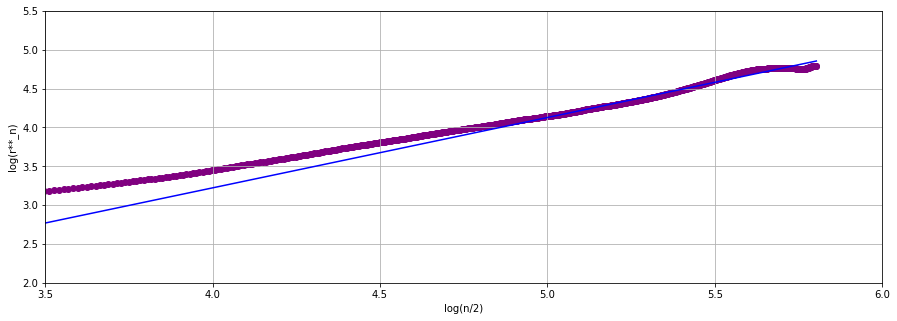

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn2_tab, log_rn_tab, c='purple')
axs.plot(logn2_tab,logn2_tab*alpha4 + b4, c = 'blue')
axs.set_ylim([2, 5.5])
axs.set_xlim([3.5, 6])

axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [24]:
print("α = {:}".format(alpha4))

α = 0.9058210898736243


# Part C - interpretation

As shown above, if wee take rescaled ranges without the shortes ones, the result from original approach (part B) converge to  Detrended  Fluctuation  Analysis.

It seems that even thou the original approach (for long ranges) and the DFA gives the same results, original approach is much worse in excluding local, short range fluctiations. (Which are not welcome, since we are focused on long range mamory phenomena)


Below I also checked, how the original method work on series converted into a random walk (for pure curiosity).
It should be equivalent to above results becouse the long range memory property does not change under "integration".

In [25]:
rn_w_tab = get_rns(get_walk(signal))

In [26]:
log_rn_w_tab = np.log(rn_w_tab) #natural logarythm
logn_tab = np.linspace(2,1 +len(rn_tab),len(rn_tab))
logn2_tab = np.log(logn_tab/2) #natural logarythm

In [27]:
alpha_w, b_w = np.polyfit(logn2_tab[2:],log_rn_w_tab[2:],1)

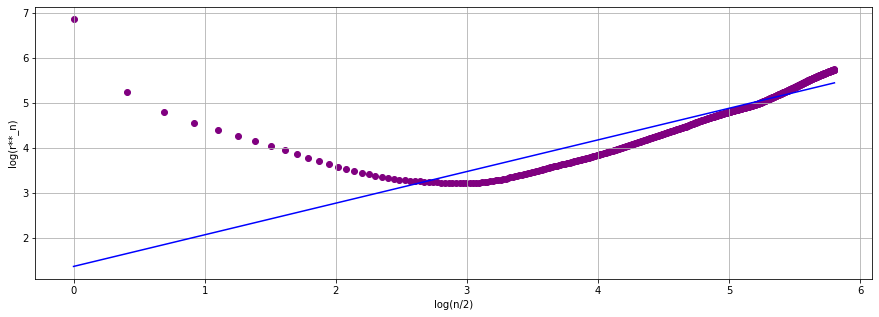

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn2_tab, log_rn_w_tab, c='purple')
axs.plot(logn2_tab,logn2_tab*alpha_w + b_w, c = 'blue')

axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [29]:
print("α = {:}".format(alpha_w))

α = 0.7034511704209696


### Fit without first 100 points

In [30]:
alpha_w2, b_w2 = np.polyfit(logn2_tab[100:],log_rn_w_tab[100:],1)

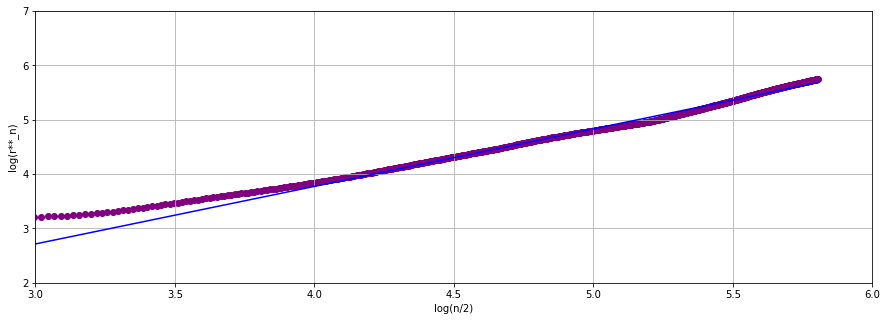

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
axs.scatter(logn2_tab, log_rn_w_tab, c='purple')
axs.plot(logn2_tab,logn2_tab*alpha_w2 + b_w2, c = 'blue')
axs.set_ylim([2, 7])
axs.set_xlim([3, 6])

axs.set_xlabel('log(n/2)')
axs.set_ylabel('log(r**_n)')
axs.grid(True)

plt.show()

In [32]:
print("α = {:}".format(alpha_w2))

α = 1.0585099545032866


### So the resluts are roughly  the same 